In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
!pip install keras 

In [2]:
import os
os.getcwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

## EDA

In [5]:
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
review_length = [len(review.split()) for review in data['review']]
data['review_length'] = review_length

In [8]:
dummy = pd.get_dummies(data.sentiment, drop_first=True)
data = pd.concat([data, dummy], axis=1)


In [9]:
data.head()

,review,sentiment,review_length,positive
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,1
2,I thought this was a wonderful way to spend ti...,positive,166,1
3,Basically there's a family where a little boy ...,negative,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1


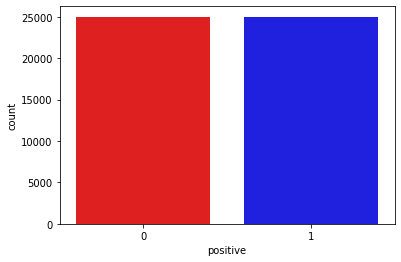

In [10]:
sns.countplot(x='positive', data=data, palette = ["red","blue"])

In [11]:
data.review_length[data["sentiment"] == "positive"].describe()

count    25000.000000
mean       232.849320
std        177.497046
min         10.000000
25%        125.000000
50%        172.000000
75%        284.000000
max       2470.000000
Name: review_length, dtype: float64

In [12]:
data.review_length[data["sentiment"] == "negative"].describe()

count    25000.000000
mean       229.464560
std        164.947795
min          4.000000
25%        128.000000
50%        174.000000
75%        278.000000
max       1522.000000
Name: review_length, dtype: float64

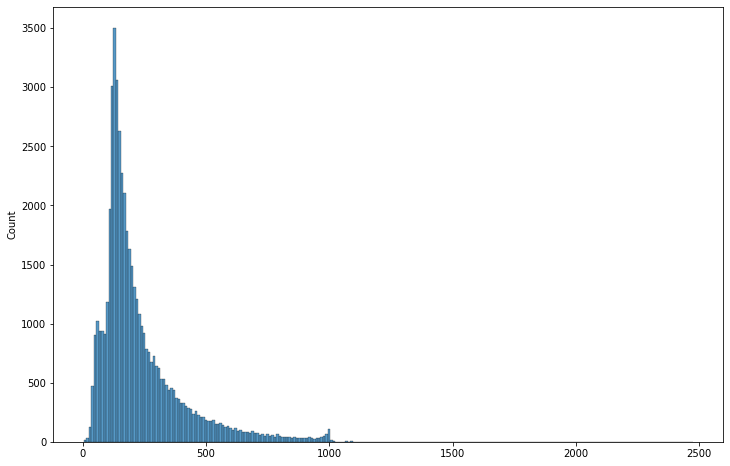

In [13]:
plt.figure(figsize = (12,8))
sns.histplot(review_length, binwidth = 10)

#### Remove HTML from reviews

In [14]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [15]:
data["clean_review"] = data.review.apply(remove_tags)

In [16]:
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,0,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,"Petter Mattei's ""Love in the Time of Money"" is..."


In [17]:
def spliter(word):
    words = []
    for i in word:
        for j in i.split():
            words.append(j.strip())
    return words
word_count = spliter(data.clean_review)

In [18]:
from collections import Counter
counter = Counter(word_count)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['word','count'])
most_common = most_common.sort_values('count', ascending=False)
most_common

,word,count
0,the,568757
1,a,306959
2,and,301924
3,of,283625
4,to,261849
5,is,203056
6,in,169982
7,I,133367
8,that,126818
9,this,113733


#### Remove stopwords from review

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [20]:
def remove_stopwords(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens=word_tokenize(text)
    tokens_without_sw = [word for word in tokens if not word in stop_words]
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text
#try vectorization through numpy. Use apply function with pandas. 

In [21]:
data['clean_review'] = data.clean_review.apply(remove_stopwords)
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production . The filming te...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,0,Basically 's family little boy ( Jake ) thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,Petter Mattei 's `` Love Time Money '' visuall...


#### Removing punctuation

In [22]:
import string
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
data['clean_review']=data['clean_review'].apply(remove_punctuations)
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,0,Basically s family little boy Jake thinks s ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,Petter Mattei s Love Time Money visually stu...


In [23]:
word_count2 = spliter(data.clean_review)
counter = Counter(word_count2)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['word','count'])
most_common = most_common.sort_values('count', ascending=False)
most_common

,word,count
0,I,156968
1,s,121783
2,movie,83890
3,The,77703
4,film,76028
5,nt,65929
6,one,47114
7,like,37692
8,It,33205
9,good,27606


In [24]:
!pip install wordcloud

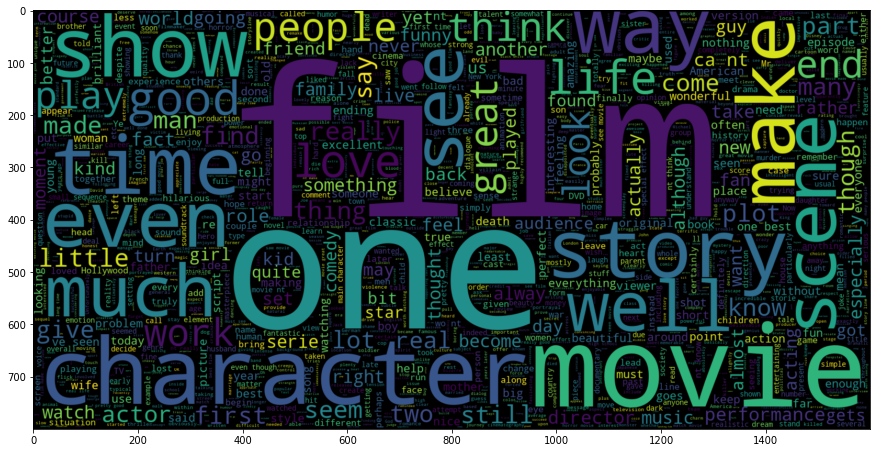

In [25]:
from wordcloud import WordCloud
# Positive Review Text
plt.figure(figsize = (15,12))
wc_pos = WordCloud(max_words = 1500, width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'positive'].clean_review))
plt.tight_layout(pad=0) #shrink the size of the border
plt.imshow(wc_pos, interpolation = 'bilinear')
#displayed image appear more smoothly

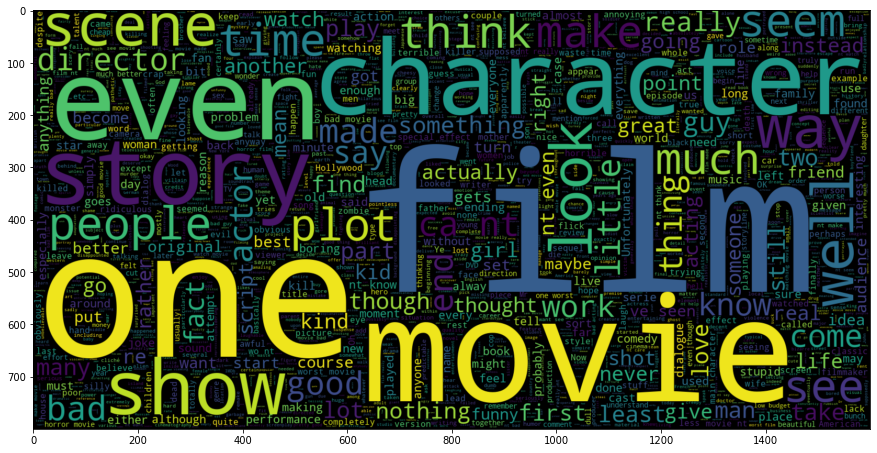

In [26]:
plt.figure(figsize = (15,12)) # Negative Review Text
wc_neg = WordCloud(max_words = 2000, width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'negative'].clean_review))
plt.imshow(wc_neg, interpolation = 'bilinear')

### Preprocessing and Modeling

#### Self-supervised learning in BERT is accomplished by masking and corrupting few words in each sentence and have the model learn by predicting those words.

#### Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT. TensorFlow Hub provides a matching preprocessing model for each of the BERT models discussed above, which implements this transformation using TF ops from the TF.text library. It is not necessary to run pure Python code outside your TensorFlow model to preprocess text.

In [27]:
!pip install tensorflow-text

     |████████████████████████████████| 4.3 MB 8.1 MB/s 


In [28]:
!pip install tf-models-official

     |████████████████████████████████| 1.6 MB 8.0 MB/s 
     |████████████████████████████████| 99 kB 11.3 MB/s 
     |████████████████████████████████| 636 kB 45.6 MB/s 
     |████████████████████████████████| 211 kB 34.5 MB/s 
     |████████████████████████████████| 352 kB 48.3 MB/s 
     |████████████████████████████████| 37.1 MB 42 kB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 1.2 MB 7.6 MB/s 
     |████████████████████████████████| 679 kB 52.4 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=9f4d5d1584f86f5473db97fd95b085f51ac47a7515ea4645654ac9586181cb23
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=8e60ab84a5f051be67ae1b47ae0b4e7e08006f15735cd1fcb0ffe709b20d8d07
  Stored in

In [29]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization 
tf.get_logger().setLevel('ERROR')

This is the preferred API to load a TF2-style SavedModel from TF Hub into a Keras model.

In [30]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [31]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [32]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [33]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  layer = outputs['pooled_output']
  layer = tf.keras.layers.Dropout(0.1)(layer)
  layer = tf.keras.layers.Dense(1, activation=None, name='classifier')(layer)
  return tf.keras.Model(text_input, layer)

In [34]:
classifier_model = build_classifier_model()
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [35]:
epochs = 3
steps_per_epoch = 625 
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [36]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [37]:
data1 = data[0:25000]
data1.shape

(25000, 5)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.clean_review, data1.positive, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [39]:
history = classifier_model.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Epoch 1/3
438/438 [==============================] - 119s 252ms/step - loss: 0.4784 - binary_accuracy: 0.7411 - val_loss: 0.3770 - val_binary_accuracy: 0.8163
Epoch 2/3
438/438 [==============================] - 110s 252ms/step - loss: 0.3100 - binary_accuracy: 0.8649 - val_loss: 0.3464 - val_binary_accuracy: 0.8585
Epoch 3/3
438/438 [==============================] - 110s 252ms/step - loss: 0.2337 - binary_accuracy: 0.9044 - val_loss: 0.3672 - val_binary_accuracy: 0.8627


In [40]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

157/157 [==============================] - 16s 99ms/step - loss: 0.3674 - binary_accuracy: 0.8626
Loss: 0.3673742711544037
Accuracy: 0.8626000285148621
